In [140]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [141]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [142]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.677309,-0.650440,2.155299,-0.370415,-0.323023,1
1,-1.199696,1.409995,0.464741,1.703169,-1.403092,0
2,-1.009620,1.265085,0.849416,-0.940167,-0.988429,1
3,-1.933879,1.140154,0.369548,1.526108,-2.333822,0
4,-3.146379,1.435996,-0.763342,1.644232,-1.852775,0


In [143]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [144]:
# function for feature sampling
import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [145]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

# Row Sampling

In [146]:
df1 = sample_rows(df,0.2)

In [147]:
df1

,col1,col2,col3,col4,col5,target
32,-1.392227,0.441842,2.515591,-0.173688,-1.964695,0
30,-2.454236,1.134574,1.359973,0.577512,-1.148373,0
12,-1.197490,0.006535,1.191685,-0.854002,-1.286232,1
50,1.129080,0.383809,2.962440,0.229898,-0.377210,0
17,-0.215645,1.651973,0.364065,2.884927,-0.279050,0
68,-1.238899,-0.226313,1.744707,-1.246589,-2.043672,0
86,-0.286027,2.365235,0.485913,-1.012475,-1.418679,1
55,-0.293330,0.445158,2.284864,-0.137814,-1.185601,0
90,-0.527410,-0.390786,1.116807,-1.614335,-1.217436,1
1,-1.199696,1.409995,0.464741,1.703169,-1.403092,0


In [148]:
df2 = sample_rows(df,0.2)

In [149]:
df3 = sample_rows(df,0.2)

In [150]:
df3.shape

(20, 6)

In [151]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [152]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [153]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.756\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.4, 0.5, 'x[0] <= -1.218\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]')]

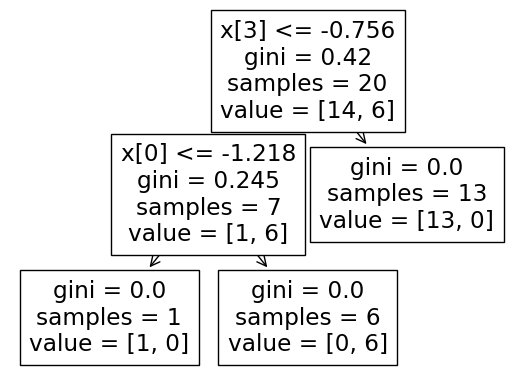

In [154]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.12\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[2] <= 1.968\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

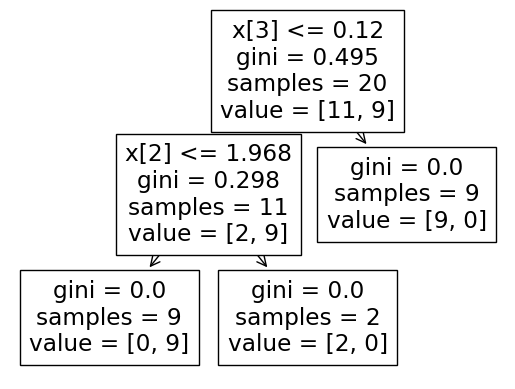

In [155]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= 0.001\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

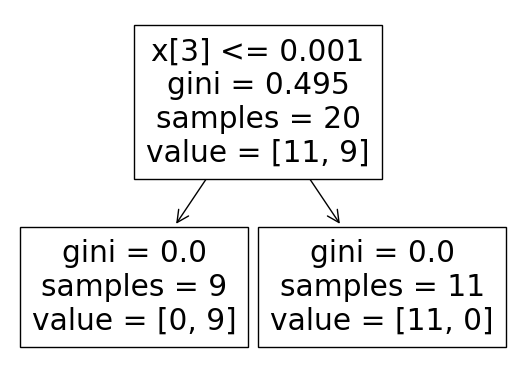

In [156]:
plot_tree(clf3)

In [157]:
clf1.predict(np.array([1.780758,-0.487686,-0.892122,1.278995,-3.425382]).reshape(1,5))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [158]:
clf2.predict(np.array([1.780758,-0.487686,-0.892122,1.278995,-3.425382]).reshape(1,5))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [159]:
clf2.predict(np.array([1.780758,-0.487686,-0.892122,1.278995,-3.425382]).reshape(1,5))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Col Sampling

In [160]:
df1 = sample_features(df,0.8)
df1.columns

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


Index(['col1', 'col5', 'col2', 'col4', 'target'], dtype='object')

In [161]:
df2 = sample_features(df,0.8)
df2.columns

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


Index(['col4', 'col1', 'col5', 'col3', 'target'], dtype='object')

In [162]:
df3 = sample_features(df,0.8)
df3.columns

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


Index(['col4', 'col3', 'col2', 'col5', 'target'], dtype='object')

In [163]:
df3

,col4,col3,col2,col5,target
0,-0.370415,2.155299,-0.650440,-0.323023,1
1,1.703169,0.464741,1.409995,-1.403092,0
2,-0.940167,0.849416,1.265085,-0.988429,1
3,1.526108,0.369548,1.140154,-2.333822,0
4,1.644232,-0.763342,1.435996,-1.852775,0
...,...,...,...,...,...
95,1.194464,-0.047934,1.151768,-1.246954,0
96,-1.072420,2.562734,0.093036,-0.344994,0
97,0.276290,1.492132,0.762650,-0.665893,0
98,1.235754,0.861885,1.524987,-0.918135,0


In [164]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [165]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5, 0.9285714285714286, 'x[3] <= -0.338\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.23529411764705882, 0.7857142857142857, 'x[0] <= 0.542\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.11764705882352941, 0.6428571428571429, 'x[1] <= -2.035\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.5, 'x[0] <= -0.518\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.11764705882352941, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.23529411764705882, 0.35714285714285715, 'x[0] <= -0.397\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.29411764705882354, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.35294117647058826, 0.6428571428571429, 'x[1] <= -0.88\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.29411764

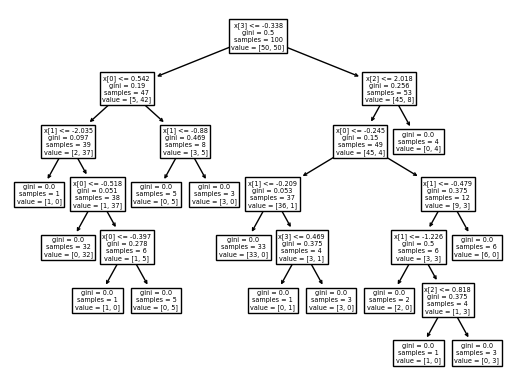

In [166]:
plot_tree(clf1)

[Text(0.3815789473684211, 0.9166666666666666, 'x[0] <= -0.338\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.21052631578947367, 0.75, 'x[3] <= 2.382\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.15789473684210525, 0.5833333333333334, 'x[2] <= -2.035\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[1] <= -0.28\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.4166666666666667, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(0.2631578947368421, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5526315789473685, 0.75, 'x[0] <= 0.272\ngini = 0.256\nsamples = 53\nvalue = [45, 8]'),
 Text(0.3684210526315789, 0.5833333333333334, 'x[2] <= -1.042\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.3157894736842105, 0.416666666

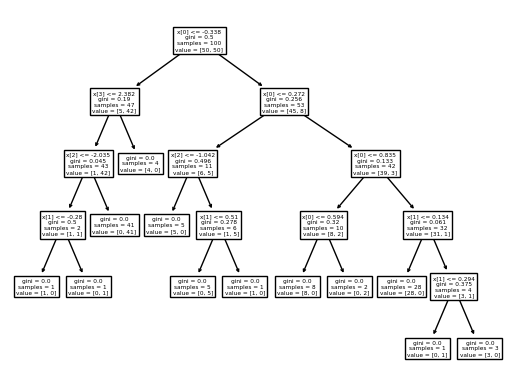

In [167]:
plot_tree(clf2)

[Text(0.4642857142857143, 0.9375, 'x[0] <= -0.338\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2857142857142857, 0.8125, 'x[1] <= 2.382\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.21428571428571427, 0.6875, 'x[3] <= -2.035\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.14285714285714285, 0.5625, 'x[0] <= -2.095\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(0.35714285714285715, 0.6875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6428571428571429, 0.8125, 'x[2] <= 2.018\ngini = 0.256\nsamples = 53\nvalue = [45, 8]'),
 Text(0.5714285714285714, 0.6875, 'x[0] <= 0.112\ngini = 0.15\nsamples = 49\nvalue = [45, 4]'),
 Text(0.42857142857142855, 0.5625, 'x[3] <= -1.038\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text

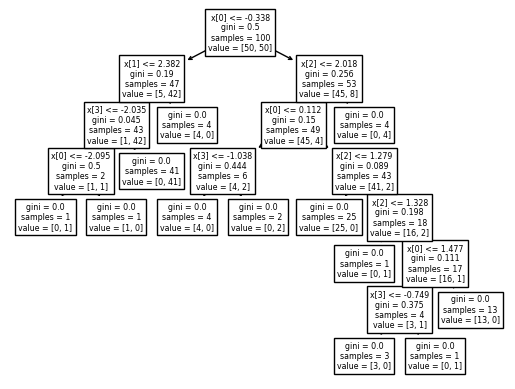

In [168]:
plot_tree(clf3)

In [169]:
clf1.predict(np.array([-0.759218,0.395324,1.503145,1.487552]).reshape(1, 4))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [170]:
clf2.predict(np.array([-0.759218,0.395324,1.503145,1.487552]).reshape(1, 4))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [171]:
clf2.predict(np.array([-0.759218,0.395324,1.503145,1.487552]).reshape(1, 4))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Combined Sampling

In [172]:
df1 = combined_sampling(df, 0.5,0.5)
df1

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col4,target
98,0.861885,1.235754,0
17,0.364065,2.884927,0
31,0.779821,-1.068455,1
99,3.599290,-0.657234,0
90,1.116807,-1.614335,1
87,1.172982,-0.358618,1
43,0.536883,-0.751649,1
90,1.116807,-1.614335,1
62,0.849853,-1.091864,1
9,1.074790,-1.537303,1


In [173]:
df1.columns

Index(['col3', 'col4', 'target'], dtype='object')

In [174]:
df2 = combined_sampling(df, 0.5,0.5)
df2.columns

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


Index(['col2', 'col1', 'target'], dtype='object')

In [175]:
df3 = combined_sampling(df, 0.5,0.5)
df3.columns

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_3200\360997045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


Index(['col4', 'col2', 'target'], dtype='object')

In [176]:
df3

,col4,col2,target
85,-1.225234,2.666138,1
89,0.987450,1.360688,0
98,1.235754,1.524987,0
75,2.038927,1.600351,0
92,-0.367671,0.007784,1
63,0.969258,0.482662,0
24,-0.657202,1.274354,1
72,1.308863,1.516256,1
70,0.231633,2.025387,1
55,-0.137814,0.445158,0


In [177]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [183]:
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:2], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.9, 'x[1] <= -0.253\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 2.877\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 1.675\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= -0.809\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.7, 'x[1] <= 0.799\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 0.974\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.3, 'gini = 0.0\nsamples = 6\nval

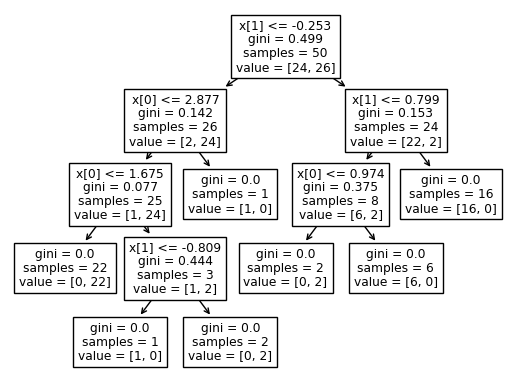

In [184]:
plot_tree(clf1)

[Text(0.5769230769230769, 0.95, 'x[0] <= 2.119\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.5, 0.85, 'x[1] <= 0.868\ngini = 0.449\nsamples = 44\nvalue = [29, 15]'),
 Text(0.4230769230769231, 0.75, 'x[0] <= -0.224\ngini = 0.381\nsamples = 39\nvalue = [29, 10]'),
 Text(0.34615384615384615, 0.65, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.65, 'x[0] <= 1.671\ngini = 0.284\nsamples = 35\nvalue = [29, 6]'),
 Text(0.3076923076923077, 0.55, 'x[0] <= 0.213\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(0.15384615384615385, 0.45, 'x[1] <= 0.535\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23076923076923078, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.46153846153846156, 0.45, 'x[1] <= -1.175\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.38461538461538464, 0.35, 'x[1] <= -1.476\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.3076923076923077, 0.25, 'x[

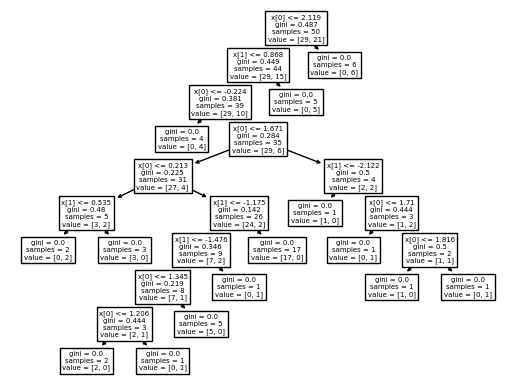

In [185]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9, 'x[0] <= -0.343\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 0.424\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -1.589\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= -0.72\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7777777777777778, 0.7, 'x[1] <= 2.008\ngini = 0.36\nsamples = 34\nvalue = [26, 8]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 1.272\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7777777777777778, 0.3, 'x[0] <= 1.477\ngini = 0.32\nsa

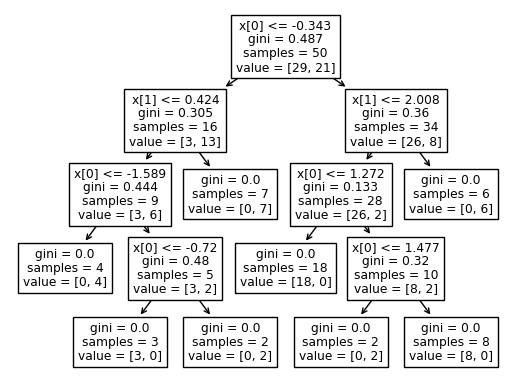

In [186]:
plot_tree(clf3)

In [187]:
clf1.predict(np.array([-1.225234,2.666138]).reshape(1, 2))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [188]:
clf2.predict(np.array([-1.225234,2.666138]).reshape(1, 2))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [189]:
clf2.predict(np.array([-1.225234,2.666138]).reshape(1, 2))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])